## Νευρωνικά Δίκτυα και Ευφυή Υπολογιστικά Συστήματα 

**Δεύτερη Εργαστηριακή Άσκηση**

Μη Επιβλεπόμενη Μάθηση

Ομάδα Β23

Νίκος Τιτομιχελάκης - ΑΜ: 03114805

Γιώργος Σουλιώτης - ΑΜ :031



## Σύστημα συστάσεων βασισμένο στο περιεχόμενο

Στο πρώτο μέρος της άσκησης ζητήθηκε η υλοποίηση ενός συστήματος συστάσεων ταινιών στον χρήστη βασισμένο στο περιεχόμενο.Ως περιεχόμενο θεωρούμε την περίληψη (corpus) της ταινίας. Μας δόθηκε ενα dataset με περίπου 40000 ταινίες. Για κάθε μια από αυτές τις ταινίες μας δίνεται ο τίτλος της, ετικέτες οι οποίες χαρακτηρίζουν το είδος της ταινίας και την περίληψη της υπόθεσης της.Στην συνέχεια εισάγουμε ολόκληρο το dataset.

In [1]:
!pip install --upgrade pip
!pip install --upgrade numpy
!pip install --upgrade pandas
!pip install --upgrade nltk
!pip install --upgrade scikit-learn

Requirement already up-to-date: pip in /usr/local/lib/python2.7/dist-packages (18.1)
Requirement already up-to-date: numpy in /usr/local/lib/python2.7/dist-packages (1.16.0)
Requirement already up-to-date: pandas in /usr/local/lib/python2.7/dist-packages (0.23.4)
Requirement already up-to-date: nltk in /usr/local/lib/python2.7/dist-packages (3.4)
Requirement already up-to-date: scikit-learn in /usr/local/lib/python2.7/dist-packages (0.20.2)


In [0]:
import pandas as pd

dataset_url = "https://drive.google.com/uc?export=download&id=1PdkVDENX12tQliCk_HtUnAUbfxXvnWuG"
# make direct link for drive docs this way https://www.labnol.org/internet/direct-links-for-google-drive/28356/
df_data_1 = pd.read_csv(dataset_url, sep='\t',  header=None, quoting=3, error_bad_lines=False)

Από αυτό το dataset θα δουλέψουμε σε ένα υποσύολο 5000 ταινιών. Μας δόθηκε αριθμός seed για να επιλέξουμε το υποσύνολο ταινιών που θα εργαστούμε. Ο αριθμός αυτός ήταν το 10.

In [0]:
import numpy as np
team_seed_number = 10
movie_seeds_url = "https://drive.google.com/uc?export=download&id=1NkzL6rqv4DYxGY-XTKkmPqEoJ8fNbMk_"
df_data_2 = pd.read_csv(movie_seeds_url, header=None, error_bad_lines=False)
my_index = df_data_2.iloc[team_seed_number,:].values

titles = df_data_1.iloc[:, [2]].values[my_index] # movie titles (string)
categories = df_data_1.iloc[:, [3]].values[my_index] # movie categories (string)
bins = df_data_1.iloc[:, [4]]
catbins = bins[4].str.split(',', expand=True).values.astype(np.float)[my_index] # movie categories in binary form (1 feature per category)
summaries =  df_data_1.iloc[:, [5]].values[my_index] # movie summaries (string)
corpus = summaries[:,0].tolist() # list form of summaries

Τώρα, έχουμε τους πίνακες οι οποίοι για κάθε ταινία περιέχουν τις πληροφορίες που αναφέρθηκαν παραπάνω.
- Ο πίνακας **titles** περιέχει τους τίτλους των ταινιών.
- O πίνακας **categories** περιέχει τις κατηγορίες (είδη) της ταινίας υπό τη μορφή string. 
- Ο πίνακας **summaries** και η λίστα **corpus** περιλαμβάνουν τις συνόψεις των ταινιών (η corpus είναι απλά ο summaries σε μορφή λίστας). Κάθε σύνοψη είναι ένα (συνήθως μεγάλο) string.
- Θεωρούμε ως **ID** της κάθε ταινίας τον αριθμό γραμμής της ή το αντίστοιχο στοιχείο της λίστας. 

Για παράδειγμα μπορούμε για την ταινία με ID=211 να δούμε τα αντίστοιχα χαρακτηριστικά της.

In [4]:
ID = 211
print(titles[ID])
print(categories[ID])
print(catbins[ID])
print(corpus[ID])

['Paper Moon']
['"Crime Fiction",  "Road movie",  "Comedy-drama",  "Black-and-white",  "Period piece",  "Drama",  "Comedy",  "Black comedy",  "New Hollywood"']
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

## Υλοποίηση συστήματος πρόβλεψης ταινιών
Το πρώτο βήμα είναι να μετατρέψουμε το coprus σε αναπαράσταση tf-idf

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english',max_df=0.7,min_df=50)
vectorizer.fit(corpus)
corpus_tf_idf = vectorizer.transform(corpus)



In [6]:
print(corpus_tf_idf.shape)

(5000, 2175)


Δεν θα κάνουμε βελτιστοποίηση ακόμα στην tf-idf. Θα υλοποιήσουμε την συνάρτηση content-recommender και με την χρήση της θα βελτιστοποιήσουμε τις παραμέτρους στη συνέχεια.
## Σημειώσεις
-  Πριν αρχίσουμε να πειραματιζόμαστε με τις παραμέτρους Tf-idf είχαμε μέγεθος (5000,48994)
-  Στην συνέχεια με την παράμετρο stop_wards=english καταλήξαμε με μέγεθος (5000,48688)
-  Παρατηρούμε οτι για την παράμετρο stop_wards=english οι προτεινόμενες ταινίες παραμείνανε ίδιες για 3 διαφορετικά ID. Οι ταινίες αυτές ήταν αρκετά κοντά στην ταινία στόχο.

Στην συνέχεια προχωράμε με την προσθήκη πρόσθετων παραμέτρων στην Tf-idf με σκοπό να μειώσουμε και άλλο τις διαστάσεις των διανυσμάτων.Θα αφαιρέσουμε μέσω της παραμέτρου min_df τους όρους που εμφανίζονται σε πολύ λίγες ταινίες.

Επιλέγουμε min_df=0.1 δηλαδή θα αφαιρέσουμε λέξεις που εμφανίζονται σε λιγότερο από το 10% των κειμένων του dataset.
Παρατηρούμε τεράστια μείωση του πλήθους των δεδομένων. Τώρα έχουμε (5000,105)

Τώρα βλέπουμε οτι τα αποτελέσμτα που παίρνουμε δεν είναι τόσο ικανοποιητικά καθώς για προτεινόμενη ταινία κατηγορίας thriller,drama,adventure με περιεχόμενο όπως διαβάζουμε από την περιγραφή "δράσης" και περιπέτειας στις προτεινόμενες ταινίες πήραμε κομωδία και romantic film.Οπότε καταλαβαίνουμε οτι η αφαίρεση λέξεων που εμφανίζονταν στο 10% των κειμένων οδήγησε στην αδυναμία του ταξινομητή να βρει κατάλληλες λέξεις κλειδιά και να συνδέσει ταινίες μεταξύ τους.

Στην συνέχεια αφαιρούμε την παράμετρο min_df και πειραματιζόμαστε με την παράμετρο max_df.Αρχίζουμε με μια τιμή max_df=0.5 δηλαδή αφαιρούμε όρους που εμφανίζονται σε ποσοστό άνω του 50% των κειμένων.Βλέπουμε διαστάσεις (5000,48688) δηλαδή δεν παρατηρούμε μείωση σε σχέση με την default τιμή.

Αυξάνουμε και άλλο το ποσοστό. Ορίζουμε την παράμετρο max_df=0.7 (70%).

Ταυτόχρονα θέτουμε την παράμετρο min_df=50 δηλαδή αφαιρόυμε όρους που εμφανίζονται σε λιγότερα από 50 documents και ξανατρέχουμε την συνάρτηση για να δούμε τα αποτελέσματα. Με αυτήν την παραδοχή οι διαστάσεις μειώθηκαν σε:
(5000,2215).

Σε αυτή τη δοκιμή παρατηρούμε οτι για την ταινία με ID=3645 οι 2 από τις 4 προτάσεις έχουν τα ίδια ID με τις ταινίες που πήραμε όταν τρέξαμε την συνάρτηση με default τιμές της tf-idf. Σημασιολογικά τώρα βλέπουμε την περιγραφή της ταινίας στόχου. Το όνομα της είναι "The Road" ανήκει στις κατηγορίες "Thriller",  "Drama",  "Adventure" και όπως διαβάζουμε σύντομα στην περιγραφή πρόκειται για έναν κατακλυσμό ο οποίος σκότωσε όλα τα ζώα και τα φυτά.Οι επιζήσαντες λόγω της δυσκολίας της επιβίωσης ωθήθηκαν στον καννιβαλισμό.Ένας πατέρας με τον γιο του προσπαθούν να επιβιώσουν στις μη ευνοϊκές συνθήκες και περνάνε δύσκολα με τον θάνατο του πατέρα.Ο πατέρας δείχνει στον γιο του πριν τον θάνατο την σημασία της ανθρωπιάς και περνάει ένα κοινωνικό μήνυμα.

Ως ταινίες προτάσεις πήραμε:
1."The girl next door" κατηγορίας: "Thriller",  "Crime Fiction",  "Horror",  "Psychological thriller",  "Cult",  "Drama",  "Slasher",  "Teen"
Όπως διαβάζουμε από την περιγραφή της ταινίας πάλι πρόκειται για ένα "οικογενειακό" δράμα με στοιχεία τρόμου καθώς μια νεαρή κοπέλα περνάει δύσκολες στιγμές στον οικογενειακό της κύκλο καθώς υφίστατι καταπίεση από τον πατέρα της και τα ξαδέρφια της.Ίδια στοιχεία με την προηγούμενη ταινία όπως πυροβολισμοί και το στοιχείο της ανθρωπιάς που η ταινία θέλει να περάσει στο τέλος.Βλέπουμε οτι στο κείμενο κάποια συναισθήματα όπως αυτό της καταπίεσης και των προβληματισμών ταυτίζονται ανάμεσα στην κοπέλα και στο αγόρι της προηγούμενης ταινίας.

2.The Debt

"Thriller",  "Drama"

Πρόκειται για μια ταινία που μιλάει για 2 άτομα που πήγαν στην ανατολική γερμανία το 1965 για να διαλευκάνουν ένα έγκλημα των ναζι από τον β' παγκόσμιο πόλεμο. Τα 2 αυτά άτομα έπεσαν θύματα απαγωγής σε ένα ταξίδι με τραίνο από ναζι .Τους ασκήθηκε ψυχολογική πίεση και δημιουργήθηκαν πολλά προβλήματα μεταξύ τους λόγω των συνθηκών κατά την κράτηση τους.Η ταινία πάλι έχει το στοιχείο της "απόγνωσης" όπως είχαν οι προηγούμενες δυο και πολλά στοιχεία από τα συναισθήματα που αναφέρονται ταυτίζονται με αυτές.

3.Straw Dogs

"Thriller",  "Crime Thriller",  "Psychological thriller"








In [0]:
import scipy as sp
from scipy.spatial import distance
from sklearn.metrics.pairwise import cosine_similarity
def content_recommender(Target_Movie,Max_recommendations):
    #Target_Movie είναι η ταινία που δίνεται ως είσοδος ("Ταινία Στόχος")
    #Σκοπός μας είναι να υπολογίσουμε Max_recommendations στο πλήθος ταινίες οι οποίες είναι πιο "κοντά" σε αυτήν.
    #Οπότε κρατάμε το Target_Movie ID και υπολογίζουμε ομοιότητα συνημιτόνουυ με ΟΛΕΣ τις ταινίες της συλλογής.
    Index=[]
    k=cosine_similarity(corpus_tf_idf[Target_Movie-1:Target_Movie],corpus_tf_idf)
    Sorted_k = k.argsort()
    for i in range(len(Sorted_k)-3,len(Sorted_k)-3-Max_recommendations,-1):
        Index.append(Sorted_k[0][i])
    print(Index)
    print(titles[Target_Movie])
    print(categories[Target_Movie])
    print(corpus[Target_Movie])
    for j in range(0,len(Index)):
        print("Recommendation:",j+1,"\n")
        #print(Index[j])
        print(titles[Index[j]])
        print(categories[Index[j]])
        print(corpus[Index[j]])
        print("\n")
        


In [8]:
content_recommender(2175,4)



[4389, 3956, 1344, 4627]
['The Other Sister']
['"Romantic comedy",  "Family Drama",  "Drama",  "Comedy",  "Romantic drama",  "Romance Film"']
After receiving a well-earned certification from a sheltered boarding school, Carla Tate , an ambitious and mildly mentally challenged autistic young woman, returns home to her over-protective mother Elizabeth . Elizabeth seems to act as if she is embarrassed about her daughter's disability. During family discussions, Elizabeth adopts an uneasy attitude. Her wisdom-hard-won father Radley  is a dentist and . Carla's ambition is to seek more independence from her family by earning a diploma from a trade school. When Carla meets another mentally challenged student, Daniel McMann , they become friends and soon fall in love. Envying Danny's freedom, Carla convinces her parents she is capable of living on her own and moves into her own apartment. After a time, Carla and Danny become sexually active together. Danny's independence is financially compromi

EDW NA KRATHSW PARADEIGMATA TAINIWS PRIN TO OPTIMIZE GIA NA EXW NA SUGKRINW:

gia target 500 ta 4 recomms xwris optize : [4615, 1404, 1534, 960]

gia targer 3645 --->>--------------------: [4849, 1477, 3324, 3459] --- [4849, 1477
           
           4202                             [1055, 4351]


# Εφαρμογή 2.  Σημασιολογική απεικόνιση της συλλογής ταινιών με χρήση SOM

In [9]:
!pip install --upgrade somoclu

Requirement already up-to-date: somoclu in /usr/local/lib/python2.7/dist-packages (1.7.5)


In [0]:
def build_final_set(doc_limit = 2000, tf_idf_only=False):
    # convert sparse tf_idf to dense tf_idf representation
    dense_tf_idf = corpus_tf_idf.toarray()[0:doc_limit,:]
    if tf_idf_only:
        # use only tf_idf
        final_set = dense_tf_idf
    else:
        # append the binary categories features horizontaly to the (dense) tf_idf features
        final_set = np.hstack((dense_tf_idf, catbins[0:doc_limit,:]))
        # η somoclu θέλει δεδομ΄ένα σε float32
    return np.array(final_set, dtype=np.float32)

In [0]:
final_set = build_final_set()

In [0]:
%matplotlib inline
import somoclu

In [13]:
print(final_set.shape)

(2000, 2497)


In [44]:
n_rows, n_columns = 25, 25
som = somoclu.Somoclu(n_columns, n_rows, compactsupport=False)
som.update_data(final_set)
%time som.train(epochs=100)

CPU times: user 17min 50s, sys: 330 ms, total: 17min 51s
Wall time: 9min 1s


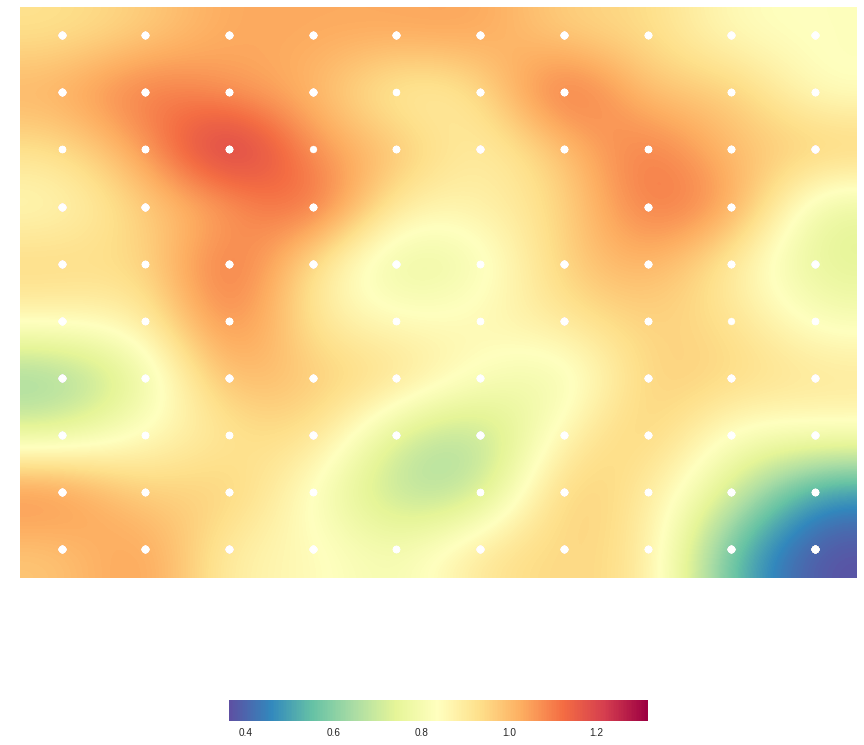

<module 'matplotlib.pyplot' from '/usr/local/lib/python2.7/dist-packages/matplotlib/pyplot.pyc'>

In [15]:
som.view_umatrix(bestmatches=True, colorbar=True, figsize=(15, 15))

In [0]:
from sklearn.cluster import KMeans
algorithm = KMeans(30)
som.cluster(algorithm=algorithm)

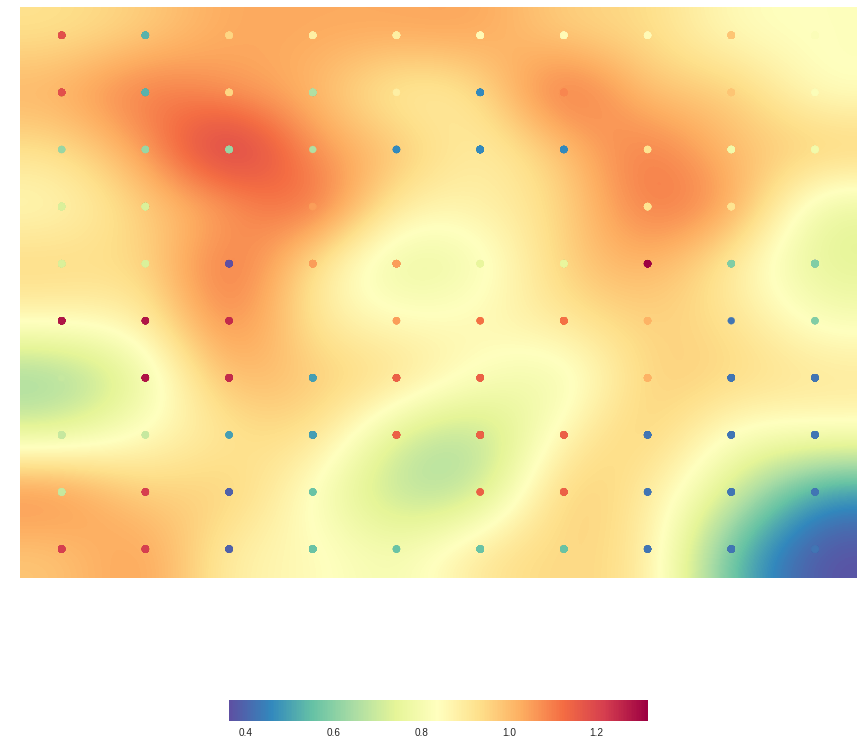

<module 'matplotlib.pyplot' from '/usr/local/lib/python2.7/dist-packages/matplotlib/pyplot.pyc'>

In [43]:
som.view_umatrix(bestmatches=True, colorbar=True, figsize=(15, 15))

In [32]:
bmus = som.bmus
print(bmus)

[[1 9]
 [9 9]
 [0 6]
 ...
 [2 9]
 [9 9]
 [6 4]]


In [33]:
print(bmus.shape)

(2000, 2)


In [0]:
from sklearn.externals import joblib
import pickle


In [0]:
from google.colab import files
joblib.dump(som,"x.pkl")
files.download('x.pkl')